# NLP & Feature Engineering
- **Import necessary libraries.**

In [19]:
# standard libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib
%matplotlib inline
import seaborn as sns; sns.set_style('ticks')

# text processing/nlp libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim import matutils, models
import scipy.sparse
from collections import Counter

# saving libraries
import gzip
import pickle

# custom functions
from functions import *

# reload when functions is edited
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# increase column width to more easily read tweets
pd.set_option('max_colwidth', 150)

# Loading csv

In [3]:
df = pd.read_csv('data/jan_thru_may_5k_tweets_clean.csv', index_col=0)
df.shape

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(575949, 17)

In [4]:
df.head()

,id,conversation_id,created_at,date,tweet,hashtags,user_id,username,name,link,retweet,nlikes,nreplies,nretweets,quote_url,retweet_id,reply_to
0,1.212523e+18,1.212523e+18,1.577923e+12,2020-01-01,"https://mltshp.com/p/1HLSB ""This is the death mask of Thomas, an unknown peasant that died in a river.""",[],8.431951e+17,Best_of_MLTSHP,MLTSHP,https://twitter.com/Best_of_MLTSHP/status/1212523477896294400,False,1.0,0.0,1.0,NaN,NaN,"[{'user_id': '843195118924546048', 'username': 'Best_of_MLTSHP'}]"
1,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,Ready to heard this? Homemade hair treatment and ann cherry dead sea mud mask... Fucking putas swear they are more woman than me.... Bitch shut th...,[],1.044739e+18,lumora_lu,MiLu,https://twitter.com/lumora_lu/status/1212518043353530368,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '1044738746913034241', 'username': 'lumora_lu'}]"
2,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,"We all know what a joke #CCPChina is when it comes to epidemic outbreak,think of how they stayed silent about #SARS.\nDear world,stay away from #H...","['#ccpchina', '#sars', '#hk', '#hkers']",9.630325e+17,odiecher,odiecher,https://twitter.com/odiecher/status/1212517557690748928,False,1.0,1.0,1.0,https://twitter.com/WBYeats1865/status/1212430526826479616,NaN,"[{'user_id': '963032516759207936', 'username': 'odiecher'}]"
3,1.212516e+18,1.200523e+18,1.577921e+12,2020-01-01,Thought death masks gave you the horn freak,[],2.819219e+09,Hevysmoker,Ashley Collins,https://twitter.com/Hevysmoker/status/1212515585562726401,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '2819219369', 'username': 'Hevysmoker'}, {'user_id': '1107018506300780544', 'username': 'cutedeadguys3'}]"
4,1.212510e+18,1.212391e+18,1.577920e+12,2020-01-01,"Interesting cult of death mask he’s wearing, 🤔\nelectronically posing as he did as of the CIA while Brennan was Chief. 🧐",[],2.361956e+08,FaithR8s,❌Patriot Fan🇺🇸🗽☕️🎶❌,https://twitter.com/FaithR8s/status/1212510409858670593,False,1.0,0.0,1.0,NaN,NaN,"[{'user_id': '236195607', 'username': 'FaithR8s'}, {'user_id': '14745988', 'username': 'ThunderB'}, {'user_id': '14138785', 'username': 'Telegraph..."


### Drop unnecessary columns

In [7]:
# drop columns we know we won't need for this project
df.drop(columns=['id', 'conversation_id', 'created_at', 'hashtags', 'user_id', 'name',
                 'retweet', 'quote_url', 'retweet_id', 'reply_to'], inplace=True)

# check
df.shape

(575949, 7)

In [8]:
df.head()

,date,tweet,username,link,nlikes,nreplies,nretweets
0,2020-01-01,"https://mltshp.com/p/1HLSB ""This is the death mask of Thomas, an unknown peasant that died in a river.""",Best_of_MLTSHP,https://twitter.com/Best_of_MLTSHP/status/1212523477896294400,1.0,0.0,1.0
1,2020-01-01,Ready to heard this? Homemade hair treatment and ann cherry dead sea mud mask... Fucking putas swear they are more woman than me.... Bitch shut th...,lumora_lu,https://twitter.com/lumora_lu/status/1212518043353530368,0.0,0.0,0.0
2,2020-01-01,"We all know what a joke #CCPChina is when it comes to epidemic outbreak,think of how they stayed silent about #SARS.\nDear world,stay away from #H...",odiecher,https://twitter.com/odiecher/status/1212517557690748928,1.0,1.0,1.0
3,2020-01-01,Thought death masks gave you the horn freak,Hevysmoker,https://twitter.com/Hevysmoker/status/1212515585562726401,0.0,0.0,0.0
4,2020-01-01,"Interesting cult of death mask he’s wearing, 🤔\nelectronically posing as he did as of the CIA while Brennan was Chief. 🧐",FaithR8s,https://twitter.com/FaithR8s/status/1212510409858670593,1.0,0.0,1.0


### Obtaining target variable

In [9]:
# instantiate Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create a column with the compound polarity score
df['sentiment_score'] = df['tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [10]:
# turn this into our target classes: negative, positive, and neutral
conditions = [
    df.sentiment_score >= .05,
    df.sentiment_score <= -.05
]

choices = [
    'positive',
    'negative'
]

df['sentiment'] = np.select(conditions, choices, 'neutral')

- **Take a look at our target variable.**

In [11]:
df.sentiment.value_counts()

positive    239222
negative    221377
neutral     115350
Name: sentiment, dtype: int64

In [12]:
df.sentiment.value_counts(normalize=True)

positive    0.415353
negative    0.384369
neutral     0.200278
Name: sentiment, dtype: float64

In [13]:
# # uncomment to save
# df.to_csv('data/5k_jan_thru_may_tweets.csv')

## Load file with sentiment

In [70]:
# # uncomment to load
# df = pd.read_csv('data/5k_jan_thru_may_tweets.csv', index_col=0)
# df.shape

(575949, 9)

## Cleaning text
- **Start with NLTK stopwords and add our own subject-specific ones.**

In [72]:
# start with NLTK stop words
stop_words = stopwords.words('english')

# add search term words and hashtags to the list
stop_words += ['mask', '#mask',
               'masks', '#masks',
               'face', '#face',
               'facemask', '#facemask',
               'facemasks', '#facemasks', 
               'covid', '#covid',
               'covid19', '#covid19',
               'corona', '#corona',
               'coronavirus', '#coronavirus',
               'rona', '#rona',
               'virus', '#virus',
               'viral', '#viral',
               'viruses', '#viruses']

# very common/conflicting stop words discovered during eda
eda_stop_words = ['wear', 'wearing', 'get', 'one', 'people', 'us', 'like', 'n95',
                  'go', 'going', 'would', 'surgical', 'via', 'also', 'use', 'even', 'know']

stop_words += eda_stop_words

### Create clean tweet column with our clean_text function
- **Also save as a series, because that'll be helpful later on.**

In [73]:
%time df['clean_tweet'] = df['tweet'].apply(lambda x: clean_text(x, stop_words))

# pull the clean tweet column
clean_tweets = df['clean_tweet']
clean_tweets.head()

CPU times: user 6min 39s, sys: 1.16 s, total: 6min 40s
Wall time: 6min 42s


0                                                                                                                  death thomas unknown peasant died river
1                                                    ready heard homemade hair treatment ann cherry dead sea mud fucking putas swear woman bitch shut fuck
2    joke #ccpchina come epidemic outbreakthink stayed silent #sars dear worldstay away #hk im sure infected amongst already dear fellow #hkers facewit...
3                                                                                                                            thought death gave horn freak
4                                                              interesting cult death thinkingface electronically posing cia brennan chief facewithmonocle
Name: clean_tweet, dtype: object

##### Save to pickle

In [18]:
# # uncomment to save
# clean_tweets.to_pickle('data/clean_tweets.pkl')

# # uncomment to load
# clean_tweets = pd.read_pickle('data/clean_tweets.pkl')

## Top words and vocabulary statistics

In [24]:
# make tweets into one big string
big_string = ' '.join(clean_tweets)
big_string[:100]

'death thomas unknown peasant died river ready heard homemade hair treatment ann cherry dead sea mud '

In [25]:
# split it into words
words = big_string.split()

###### Number of words in our corpus

In [26]:
len(words)

7793391

###### Total unique vocabulary

In [27]:
total_vocab = set(words)
len(total_vocab)

243080

- **Create a word list with corresponding frequencies in the corpus and look at the 25 most frequent words in our cleaned tweets.**

In [28]:
Counter(words).most_common(25)

[('hand', 40134),
 ('need', 39383),
 ('spread', 33418),
 ('protect', 32088),
 ('make', 31605),
 ('help', 30306),
 ('say', 28477),
 ('glove', 27649),
 ('public', 25717),
 ('hospital', 25525),
 ('new', 25340),
 ('time', 25085),
 ('medical', 24652),
 ('china', 24641),
 ('doctor', 24152),
 ('home', 23986),
 ('work', 23382),
 ('day', 22567),
 ('stop', 21958),
 ('trump', 21074),
 ('infected', 21008),
 ('please', 20635),
 ('everyone', 20359),
 ('health', 20312),
 ('death', 20287)]

- **Create a similar object in dictionary format and convert to DataFrame.**

In [29]:
fdist = FreqDist(words)
fdist

FreqDist({'hand': 40134, 'need': 39383, 'spread': 33418, 'protect': 32088, 'make': 31605, 'help': 30306, 'say': 28477, 'glove': 27649, 'public': 25717, 'hospital': 25525, ...})

In [30]:
word_counts = pd.DataFrame(data=fdist.values(), index=fdist.keys(), columns=['word_count'])
word_counts = word_counts.sort_values('word_count', ascending=False)
word_counts.head()

,word_count
hand,40134
need,39383
spread,33418
protect,32088
make,31605


- **Take the top 25 words and create a visualization.**

In [31]:
top25_words = word_counts.iloc[:25,:]

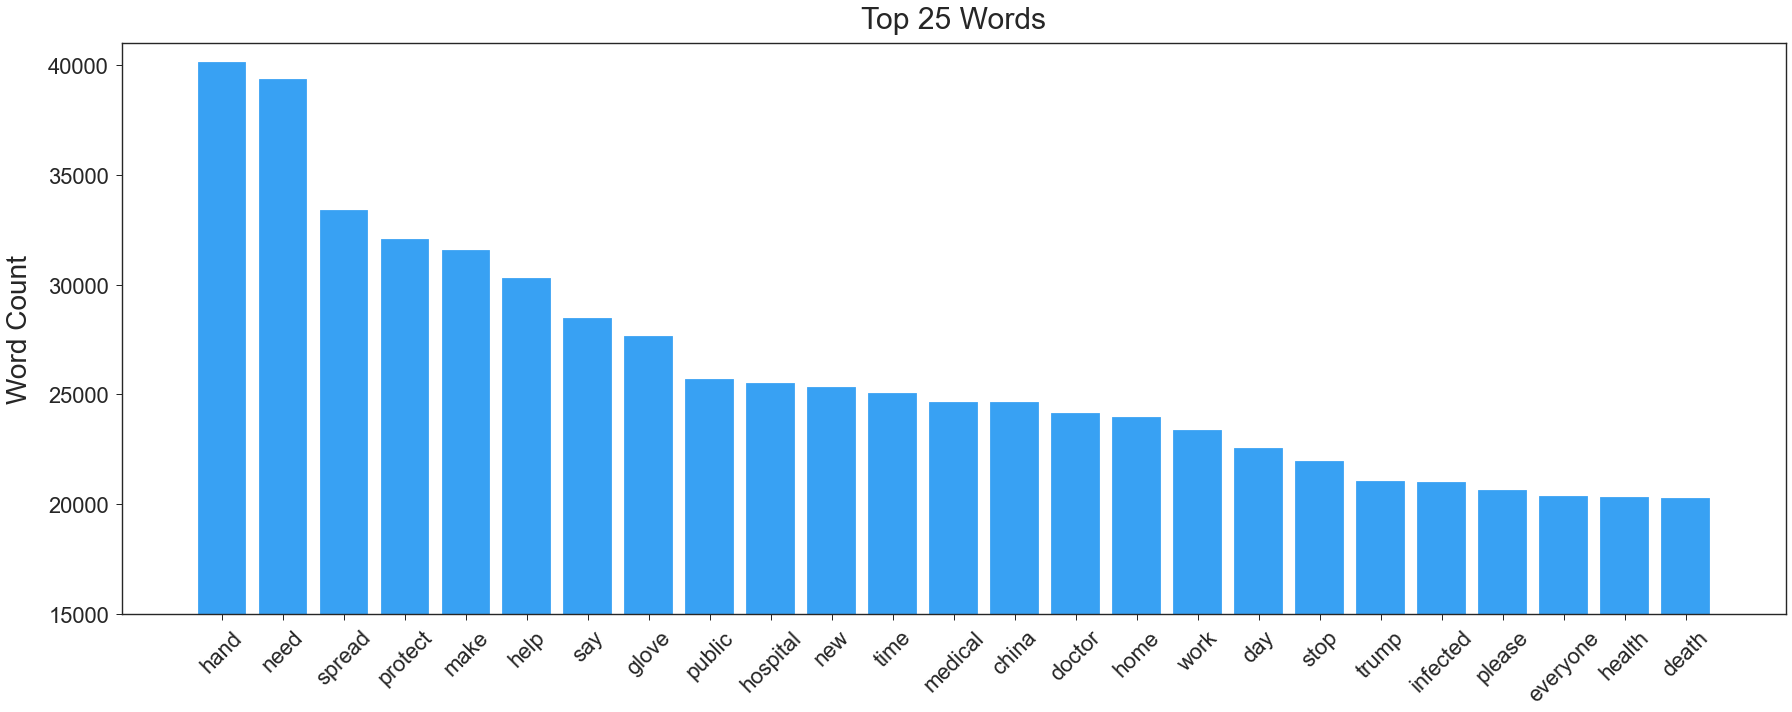

In [128]:
# prettify the chart
plt.figure(figsize=(25,10))
plt.title('Top 25 Words', fontsize=30, pad=15)
plt.ylabel('Word Count', fontsize=28, labelpad=15)
plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(bottom=15000, top=41000)

# plot bar chart with twitter blue ;)
plt.bar(top25_words.index, top25_words.word_count, color='#38A1F3')

# prepare to save and display
plt.tight_layout()
plt.savefig('images/top25_words_bar.png', bbox_inches='tight', transparent=True)
plt.show()

## Sparse vector matrix
- **Our main features, which we will also use for LDA topic modeling.**

In [21]:
# regex pattern to vectorize by
pattern = "(#?[a-zA-Z]+[0-9]*(?:'[a-zx]+)?)"

In [22]:
# create a document-term matrix using TfidfVectorizer, using custom regex tokenizing pattern
# only take words with at least 250 appearances
tf_idf = TfidfVectorizer(min_df=250, token_pattern=pattern)
%time data_tf_idf = tf_idf.fit_transform(clean_tweets)

# save as a DataFrame
data_vec = pd.DataFrame(data_tf_idf.toarray(), columns=tf_idf.get_feature_names())
data_vec.head()

CPU times: user 8.28 s, sys: 202 ms, total: 8.49 s
Wall time: 8.51 s


,#airlines,#amazon,#america,#americanairlines,#art,#besafe,#breaking,#breakingnews,#business,#california,...,yorkers,young,youre,youth,youtube,yr,zanyface,zero,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
data_vec.shape

(575949, 3712)

###### Pickle the gensim corpus and vocab locations

In [42]:
# uncomment to save
# with gzip.open('data/gensim_corpus.pkl', 'wb') as c:
#     pickle.dump(corpus, c, protocol=pickle.HIGHEST_PROTOCOL)
    
# with gzip.open('data/gensim_id2word.pkl', 'wb') as i:
#     pickle.dump(id2word, i, protocol=pickle.HIGHEST_PROTOCOL)

In [48]:
# uncomment to load
# with gzip.open('gensim_corpus.pkl', 'rb') as c:
#     corpus = pickle.load(c)
    
# with gzip.open('gensim_id2word.pkl', 'rb') as i:
#     id2word = pickle.load(i)

## LDA topic modeling
#### PLEASE NOTE: These are not our original topics. Unfortunately we lost those (except for a screenshot, which resides in our Images folder); we used those original topics for our presentation.

In [34]:
%%time

# one of the required inputs is a term-document matrix
tdm = data_vec.transpose()
tdm.head()

# put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
# TAKES A FEW MINUTES
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

# gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in tf_idf.vocabulary_.items())

CPU times: user 1min 15s, sys: 21.6 s, total: 1min 36s
Wall time: 1min 52s


- **Use corpus and dictionary of term locations.**
- **Set number of topics and passes to create an LDA model.**

###### NOTE: keeping passes low due to the size of our dataset.

In [37]:
%%time

# create the topics
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, passes=100, iterations=100)

# view the topics
lda.print_topics()

CPU times: user 3h 12min 16s, sys: 17.3 s, total: 3h 12min 33s
Wall time: 3h 12min 51s


[(0,
  '0.009*"protest" + 0.007*"facewithtearsofjoy" + 0.007*"think" + 0.007*"still" + 0.006*"want" + 0.006*"riot" + 0.006*"see" + 0.006*"got" + 0.005*"make" + 0.005*"without"'),
 (1,
  '0.013*"facewithmedicalmask" + 0.011*"county" + 0.011*"weekend" + 0.010*"design" + 0.010*"#health" + 0.010*"thinkingface" + 0.010*"shirt" + 0.009*"#sale" + 0.009*"period" + 0.009*"forgot"'),
 (2,
  '0.015*"business" + 0.011*"healthy" + 0.010*"#socialdistancing" + 0.009*"need" + 0.009*"taking" + 0.009*"biden" + 0.008*"care" + 0.008*"person" + 0.008*"u" + 0.007*"hide"'),
 (3,
  '0.014*"spread" + 0.013*"protect" + 0.011*"transmission" + 0.011*"distance" + 0.010*"safe" + 0.010*"cloth" + 0.010*"stay" + 0.010*"others" + 0.009*"prevent" + 0.008*"help"'),
 (4,
  '0.022*"pandemic" + 0.013*"fauci" + 0.012*"reduce" + 0.011*"wave" + 0.010*"guidance" + 0.010*"healthy" + 0.010*"#staysafe" + 0.009*"spread" + 0.009*"rule" + 0.008*"patient"'),
 (5,
  '0.013*"lockdown" + 0.009*"mandatory" + 0.009*"#pandemic" + 0.009*"wor

### Save/Load LDA model

In [41]:
# # uncomment to save
# with gzip.open('models/lda_10topics_100passes.pkl', 'wb') as goodbye:
#     pickle.dump(lda, goodbye, protocol=pickle.HIGHEST_PROTOCOL)

# # uncomment to load
# with gzip.open('models/lda_10topics_100passes.pkl', 'rb') as hello:
#     lda = pickle.load(hello)

###### Assign each tweet to the topic to which it most closely fits

In [44]:
# corpus from LDA model
corpus_transformed = lda[corpus]

# confirm size
len(corpus_transformed)

575949

In [45]:
# check out an example
corpus_transformed[0]

[(0, 0.03400737),
 (1, 0.03400346),
 (2, 0.034003943),
 (3, 0.034011845),
 (4, 0.03400346),
 (5, 0.034005884),
 (6, 0.03400346),
 (7, 0.24029602),
 (8, 0.03400346),
 (9, 0.4876611)]

In [53]:
# obtain the topic that a resembles the tweet most
topics = [lda_getter(x) for x in corpus_transformed]

# confirm shape
len(topics)

575949

In [54]:
# check out an example
topics[:10]

[9, 0, 0, 0, 4, 7, 0, 1, 7, 2]

In [77]:
# turn list into dataframe column
df['lda_topic_max'] = topics
df['lda_topic_max'].head()

0    9
1    0
2    0
3    0
4    4
Name: lda_topic_max, dtype: int64

In [61]:
# convert lda tuples to dictionary
lda_topics_dict = [dict(x) for x in corpus_transformed]

# confirm
lda_topics_dict[0]

{0: 0.034007385,
 1: 0.034003474,
 2: 0.034003954,
 3: 0.0340128,
 4: 0.034003474,
 5: 0.034005903,
 6: 0.034003474,
 7: 0.24029614,
 8: 0.034003474,
 9: 0.48765993}

In [66]:
# convert list of lda topic weights to dataframe
lda_df = pd.DataFrame(lda_topics_dict)

# rename columns
lda_df.rename(columns={i: f'lda_{i}' for i in range(10)}, inplace=True)

# check it out
lda_df.head()

,lda_0,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9
0,0.034007,0.034003,0.034004,0.034013,0.034003,0.034006,0.034003,0.240296,0.034003,0.487660
1,0.663764,0.021881,0.083800,0.021914,0.021928,0.021918,0.021882,0.099155,0.021879,0.021880
2,0.685744,0.020862,0.020866,0.020862,0.020862,0.081748,0.020860,0.086472,0.020860,0.020863
3,0.475637,0.033897,0.033904,0.033899,0.033897,0.033902,0.033897,0.033901,0.253149,0.033917
4,0.029398,0.259527,0.029399,0.029394,0.411830,0.029402,0.029416,0.029392,0.029392,0.122849


In [78]:
df = pd.concat([df, lda_df], axis=1)
df.head()

,date,tweet,username,link,nlikes,nreplies,nretweets,sentiment_score,sentiment,clean_tweet,...,lda_0,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9
0,2020-01-01,"https://mltshp.com/p/1HLSB ""This is the death mask of Thomas, an unknown peasant that died in a river.""",Best_of_MLTSHP,https://twitter.com/Best_of_MLTSHP/status/1212523477896294400,1.0,0.0,1.0,-0.8176,negative,death thomas unknown peasant died river,...,0.034007,0.034003,0.034004,0.034013,0.034003,0.034006,0.034003,0.240296,0.034003,0.487660
1,2020-01-01,Ready to heard this? Homemade hair treatment and ann cherry dead sea mud mask... Fucking putas swear they are more woman than me.... Bitch shut th...,lumora_lu,https://twitter.com/lumora_lu/status/1212518043353530368,0.0,0.0,0.0,-0.8905,negative,ready heard homemade hair treatment ann cherry dead sea mud fucking putas swear woman bitch shut fuck,...,0.663764,0.021881,0.083800,0.021914,0.021928,0.021918,0.021882,0.099155,0.021879,0.021880
2,2020-01-01,"We all know what a joke #CCPChina is when it comes to epidemic outbreak,think of how they stayed silent about #SARS.\nDear world,stay away from #H...",odiecher,https://twitter.com/odiecher/status/1212517557690748928,1.0,1.0,1.0,0.6705,positive,joke #ccpchina come epidemic outbreakthink stayed silent #sars dear worldstay away #hk im sure infected amongst already dear fellow #hkers facewit...,...,0.685744,0.020862,0.020866,0.020862,0.020862,0.081748,0.020860,0.086472,0.020860,0.020863
3,2020-01-01,Thought death masks gave you the horn freak,Hevysmoker,https://twitter.com/Hevysmoker/status/1212515585562726401,0.0,0.0,0.0,-0.7783,negative,thought death gave horn freak,...,0.475637,0.033897,0.033904,0.033899,0.033897,0.033902,0.033897,0.033901,0.253149,0.033917
4,2020-01-01,"Interesting cult of death mask he’s wearing, 🤔\nelectronically posing as he did as of the CIA while Brennan was Chief. 🧐",FaithR8s,https://twitter.com/FaithR8s/status/1212510409858670593,1.0,0.0,1.0,-0.2960,negative,interesting cult death thinkingface electronically posing cia brennan chief facewithmonocle,...,0.029398,0.259527,0.029399,0.029394,0.411830,0.029402,0.029416,0.029392,0.029392,0.122849


In [80]:
df.shape

(575949, 21)

##### Let's see if there's any discernable relationship between topics and time

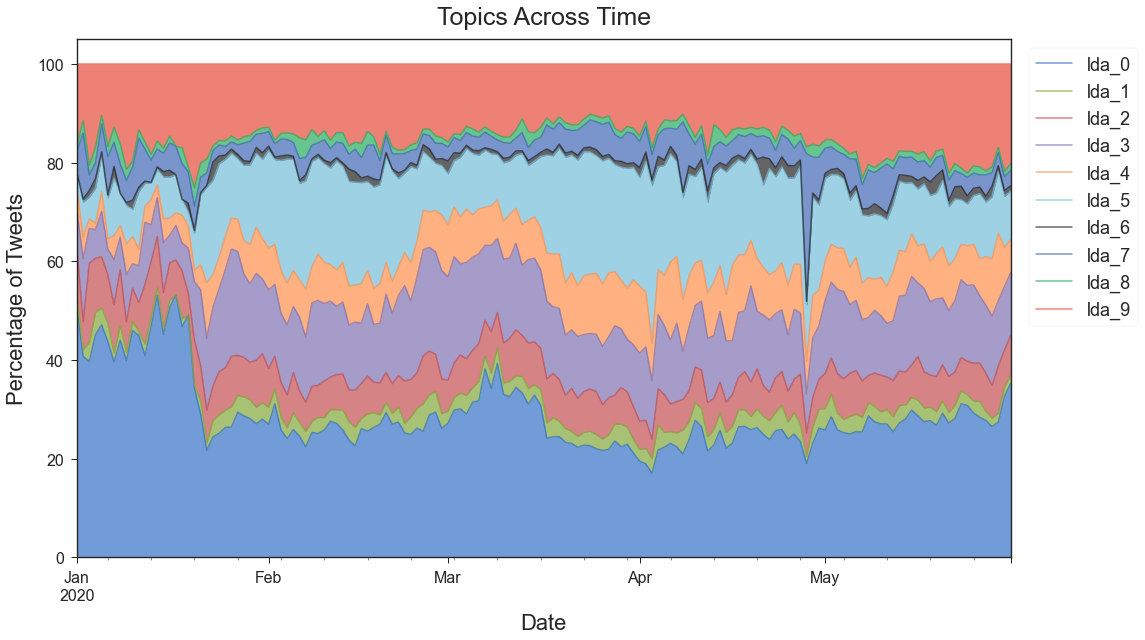

In [127]:
# sort by percentage of trees in good health
days = df.groupby('date').lda_topic_max.value_counts(normalize=True).unstack()

# plot a stacked bar graph
p1 = days.plot.area(stacked=True, figsize=(16,9), alpha=0.7, fontsize=16)

# prettify the graph
p1.set_title('Topics Across Time', fontsize=25, pad=15)
p1.set_xlabel('Date', fontsize=22, labelpad=10)
p1.set_ylabel('Percentage of Tweets', fontsize=22, labelpad=10)
p1.set_yticklabels(range(0,101,20), fontsize=16)
p1.legend([f'lda_{i}' for i in range(10)], facecolor='white',
          framealpha=1, bbox_to_anchor=(1.01, 1.0), fontsize=18)

# prepare to save and display
plt.tight_layout()
plt.savefig('images/topics_across_time_barstack.png', bbox_inches='tight', transparent=True)
plt.show()

- **Not the most readable graph, but does show some interesting activity around January 20 and the end of April.**

- **We'll now look at the relationship between sentiment and topics.**

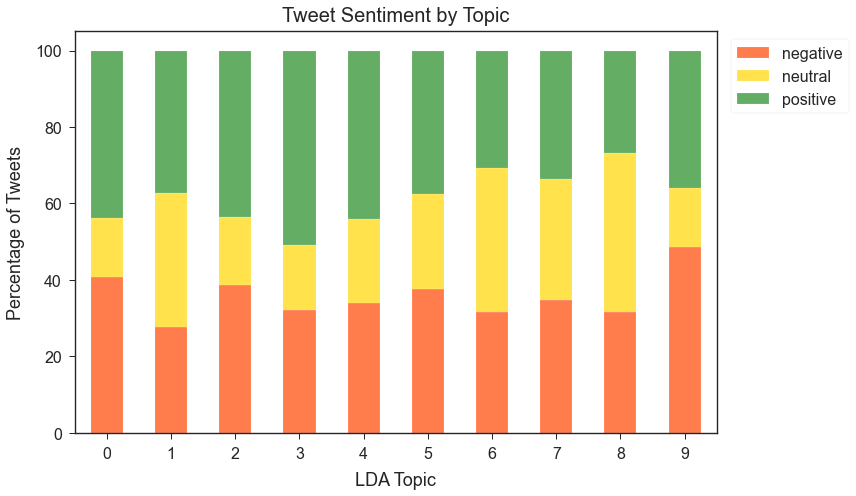

In [136]:
# sort by percentage of topics in good health
days = df.groupby('lda_topic_max').sentiment.value_counts(normalize=True).unstack()

# plot a stacked bar graph
p2 = days.plot(kind='bar', stacked=True, figsize=(12,7), color=['orangered', 'gold', 'forestgreen'],
               alpha=0.7, fontsize=16)

# prettify the chart
p2.set_title('Tweet Sentiment by Topic', fontsize=20, pad=10)
p2.set_xlabel('LDA Topic', fontsize=18, labelpad=10)
p2.set_ylabel('Percentage of Tweets', fontsize=18, labelpad=10)
p2.set_xticklabels(range(10), rotation=0, fontsize=16)
p2.set_yticklabels(range(0,101,20), fontsize=16)
p2.legend(['negative', 'neutral', 'positive'], facecolor='white', framealpha=1,
          bbox_to_anchor=(1.01, 1.0), fontsize=16)

# prepare to save and display
plt.tight_layout()
plt.savefig('images/sentiment_topics_barstack.png', bbox_inches='tight', transparent=True)
plt.show()

- **Tweet topics have some definite affects on sentiment.**
    - **Topic 1 seems a bit strange to contain such a large amount of neutral tweets, something I assume mostly applies to news tweets, which makes sense for topic 6 (*news*, *study*, *claim*) and topic 8 (*data*, *nursing*).**
        - **Topic 1 has emojis, one of which is the generally ironic thinkingface and the other generally pro-mask.**
        - **Topic 8 does oddly contain *hoax* though this may be in relation to a news story reporting people's feelings toward COVID.**
    - **Topic 9 has a lot of negative tweets, which seems to make sense, discussing things like trump, death, social distancing (viewed negatively by some).**
    - **Topic 3 has the most positive tweets, which also seems to make sense, given words like *protect*, *help*, *others*, etc. It appears to be about the common good and using masks to help keep others safe.**

In [109]:
lda.print_topics()

[(0,
  '0.009*"protest" + 0.007*"facewithtearsofjoy" + 0.007*"think" + 0.007*"still" + 0.006*"want" + 0.006*"riot" + 0.006*"see" + 0.006*"got" + 0.005*"make" + 0.005*"without"'),
 (1,
  '0.013*"facewithmedicalmask" + 0.011*"county" + 0.011*"weekend" + 0.010*"design" + 0.010*"#health" + 0.010*"thinkingface" + 0.010*"shirt" + 0.009*"#sale" + 0.009*"period" + 0.009*"forgot"'),
 (2,
  '0.015*"business" + 0.011*"healthy" + 0.010*"#socialdistancing" + 0.009*"need" + 0.009*"taking" + 0.009*"biden" + 0.008*"care" + 0.008*"person" + 0.008*"u" + 0.007*"hide"'),
 (3,
  '0.014*"spread" + 0.013*"protect" + 0.011*"transmission" + 0.011*"distance" + 0.010*"safe" + 0.010*"cloth" + 0.010*"stay" + 0.010*"others" + 0.009*"prevent" + 0.008*"help"'),
 (4,
  '0.022*"pandemic" + 0.013*"fauci" + 0.012*"reduce" + 0.011*"wave" + 0.010*"guidance" + 0.010*"healthy" + 0.010*"#staysafe" + 0.009*"spread" + 0.009*"rule" + 0.008*"patient"'),
 (5,
  '0.013*"lockdown" + 0.009*"mandatory" + 0.009*"#pandemic" + 0.009*"wor

## Subjectivity
- **Use TextBlob to calculate the subjectivity of tweets.**

In [110]:
df['subjectivity_score'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.subjectivity_score.head()

0    0.600000
1    0.560000
2    0.462963
3    0.000000
4    0.500000
Name: subjectivity_score, dtype: float64

In [111]:
df.subjectivity_score.describe()

count    575949.000000
mean          0.370732
std           0.290762
min           0.000000
25%           0.050000
50%           0.397576
75%           0.565000
max           1.000000
Name: subjectivity_score, dtype: float64

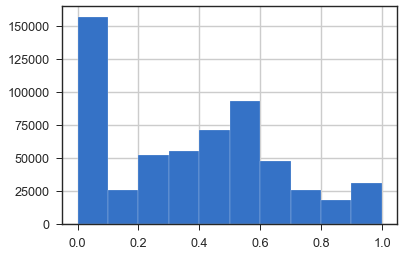

In [112]:
df.subjectivity_score.hist()

- **Look at the relationship between subjectivity and sentiment.**

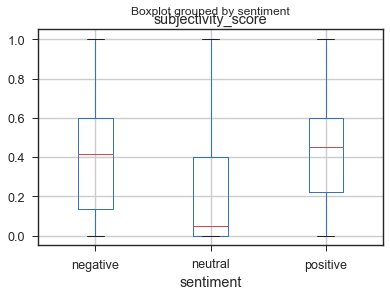

In [113]:
df.boxplot('subjectivity_score', 'sentiment')

- **As expected, neutral tweets tend to be more objective, whereas positive and negative tweets are more subjective.**

###### How about between subjectivity and LDA topics?

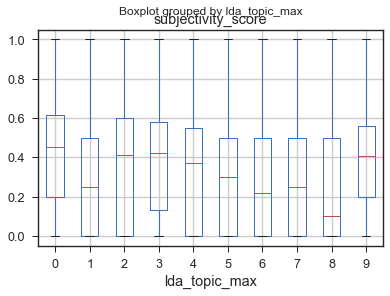

In [115]:
df.boxplot('subjectivity_score', 'lda_topic_max')

- **Some difference here but nothing too telling, given the generalness of LDA topics.**

###### Make sure our DataFrame has all the columns.

In [116]:
df.columns

Index(['date', 'tweet', 'username', 'link', 'nlikes', 'nreplies', 'nretweets',
       'sentiment_score', 'sentiment', 'clean_tweet', 'lda_topic_max', 'lda_0',
       'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6', 'lda_7', 'lda_8',
       'lda_9', 'subjectivity_score'],
      dtype='object')

- **Save for good measure.**

In [117]:
# uncomment to save
df.to_csv('data/5k_jan_thru_may_tweets_plus_features.csv')

# uncomment to load
df = pd.read_csv('data/5k_jan_thru_may_tweets_plus_features.csv', index_col=0)

# EDA
## Sentiment over time

In [144]:
# proportion of sentiments by day
df.groupby('date')['sentiment'].value_counts(normalize=True).unstack()

sentiment,negative,neutral,positive
date,,,
2020-01-01,0.692308,0.054945,0.252747
2020-01-02,0.566879,0.089172,0.343949
2020-01-03,0.602564,0.108974,0.288462
2020-01-04,0.587097,0.083871,0.329032
2020-01-05,0.500000,0.097701,0.402299
...,...,...,...
2020-05-27,0.425400,0.180400,0.394200
2020-05-28,0.421400,0.177800,0.400800
2020-05-29,0.395200,0.148600,0.456200


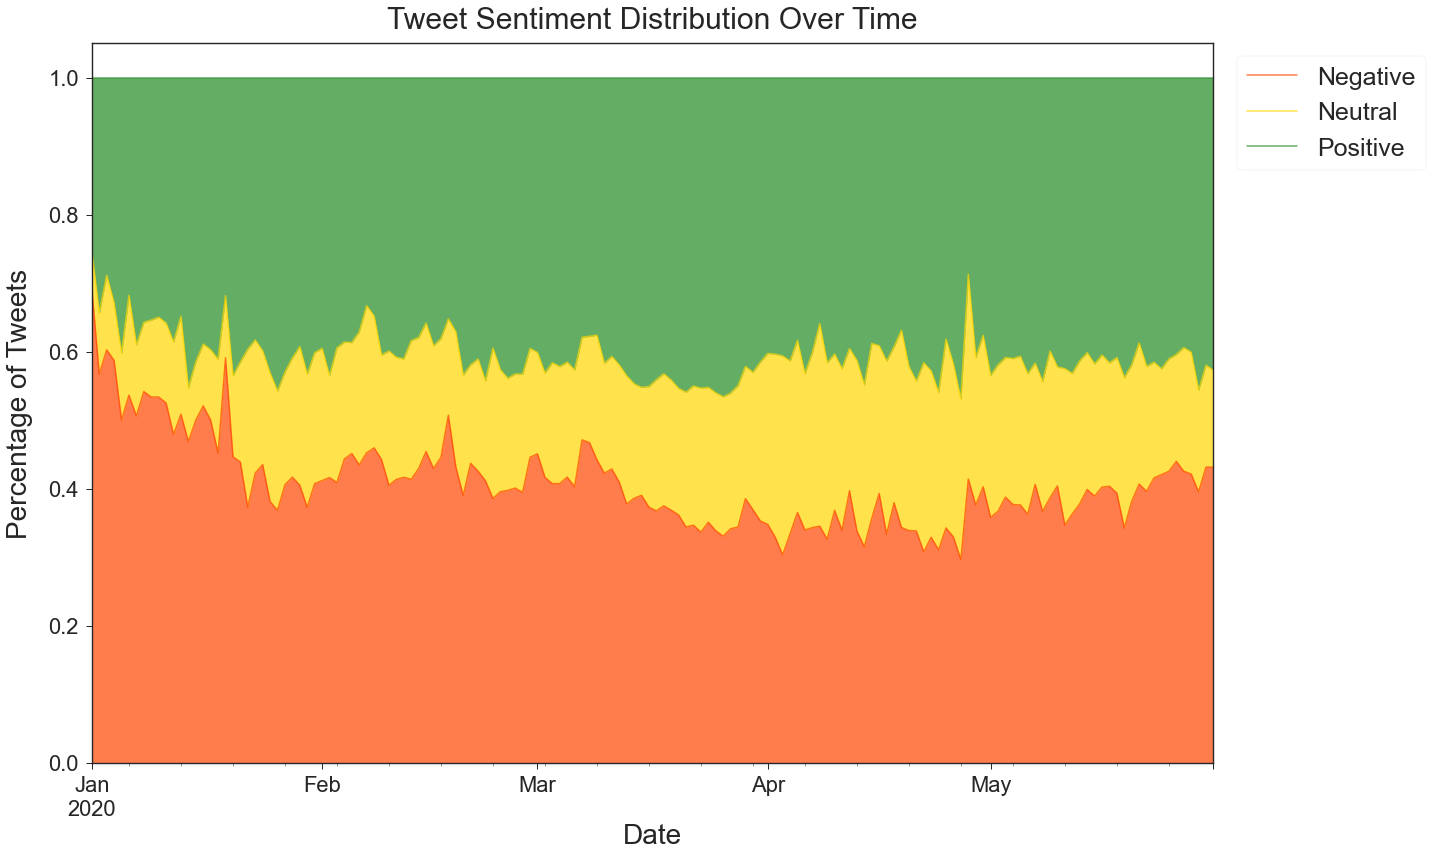

In [145]:
# proportion of sentiments by day
sent_by_day = df.groupby('date')['sentiment'].value_counts(normalize=True).unstack()

# plot a stacked line graph
p3 = sent_by_day.plot.area(stacked=True, figsize=(20,12),
                           color=['orangered', 'gold', 'forestgreen'], alpha=0.7)

# prettify the graph
p3.set_title('Tweet Sentiment Distribution Over Time', fontsize=30, pad=15)
p3.set_xlabel('Date', fontsize=28)
p3.set_ylabel('Percentage of Tweets', fontsize=28, labelpad=15)
p3.legend(['Negative', 'Neutral', 'Positive'], facecolor='white', framealpha=1,
          bbox_to_anchor=(1.01, 1.0), fontsize=25)
plt.setp(p3.get_xticklabels(), fontsize=22)
plt.setp(p3.get_yticklabels(), fontsize=22);

# prepare to save and display
plt.tight_layout()
plt.savefig('images/sentiment_stacked_line.png', bbox_inches='tight', transparent=True)
plt.show()

- **Tweets start off as overwhelming negative in the first half of January, though it should be noted that there are far fewer tweets from that time period, so this should be taken with a rather large grain of salt.**
- **Mid-February is another point of interest, with a large spike in negative tweets, perhaps corresponding to the first rumblings of COVID in the US.**
- **Negativity appears to gradually decrease until the end of April, which corresponds with a spike in Topic 7 (Trump and the social distancing protests), and negativity increases until the end of May.**
- **Positivity has its strongest moments in mid- to late-March, but stays fairly constant throughout.**
- **Overall, we don't see any overwhelming shift in sentiment, merely a fairly consistently polarized twitterverse.**

### Number of likes

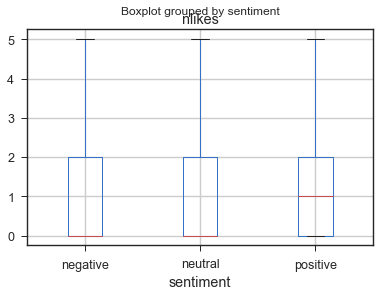

In [141]:
df.boxplot('nlikes', 'sentiment', showfliers=False)

In [118]:
df[df.nlikes > 0].groupby('sentiment').tweet.count()

sentiment
negative    105461
neutral      49184
positive    121344
Name: tweet, dtype: int64

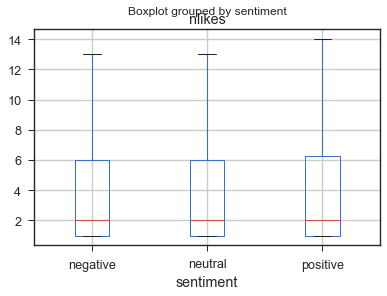

In [142]:
df[df.nlikes > 0].boxplot('nlikes', 'sentiment', showfliers=False)

In [119]:
df[df.nlikes > 10].groupby('sentiment')['tweet'].count()

sentiment
negative    18052
neutral      8219
positive    21359
Name: tweet, dtype: int64

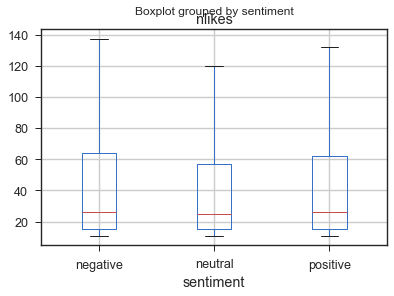

In [143]:
df[df.nlikes > 10].boxplot('nlikes', 'sentiment', showfliers=False)

- **Number of likes appears static across different sentiment.**


- **We'll next look at sentiment across each month.**

In [121]:
# convert date column to datetime
df['date'] = df.date.astype('datetime64[ns]')

In [122]:
df['month'] = df.date.apply(lambda x: x.month)
df['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [123]:
df.groupby('month').sentiment.value_counts(normalize=True)

month  sentiment
1      positive     0.412410
       negative     0.409071
       neutral      0.178519
2      negative     0.421351
       positive     0.401875
       neutral      0.176774
3      positive     0.430681
       negative     0.387311
       neutral      0.182008
4      positive     0.405673
       negative     0.346020
       neutral      0.248307
5      positive     0.417239
       negative     0.393471
       neutral      0.189290
Name: sentiment, dtype: float64

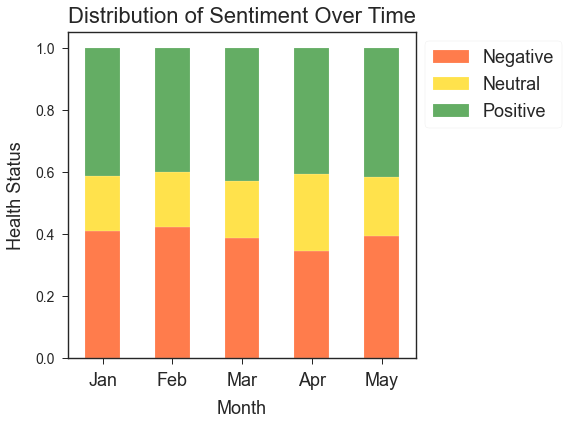

In [133]:
# prepare data for stacked bar, sort by percentage of trees in good health
month_sentiment = df.groupby('month').sentiment.value_counts(normalize=True).unstack()

# plot stacked bar graph
p3 = month_sentiment.plot(kind='bar', stacked=True, figsize=(8,6),
                           color=['orangered', 'gold', 'forestgreen'], alpha=0.7, fontsize=14)

# prettify the graph
p3.set_title('Distribution of Sentiment Over Time', fontsize=22, pad=10)
p3.set_xlabel('Month', fontsize=18, labelpad=10)
p3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May'], rotation='horizontal', fontsize=18)
p3.set_ylabel('Health Status', fontsize=18, labelpad=10)
p3.legend(['Negative', 'Neutral', 'Positive'], fontsize=18, bbox_to_anchor=(1,1))

# prepare to save and display
plt.tight_layout()
plt.savefig('images/sentiment_month_barstack.png', bbox_inches='tight', transparent=True)
plt.show()

- **Positive tweets gain a slight edge during March and April, but are generally fairly even.**
- **April stands out for having noticeably more neutral tweets, perhaps a result of wider news coverage.**